# <center> ***MACHINE LEARNING BASED BREAST CANCER PREDICTION SYSTEM*** </center>


### ***Importing Libraries***

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
import pickle

### ***Reading Dataset csv file***

In [2]:
df=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


### ***Checking Shape of Dataset***

In [3]:
df.shape

(569, 33)

### ***Getting some information***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#droppong id and Unnamed: 32 columns
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [6]:
#spllitng into output and input
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

## ***Checking Outliers***

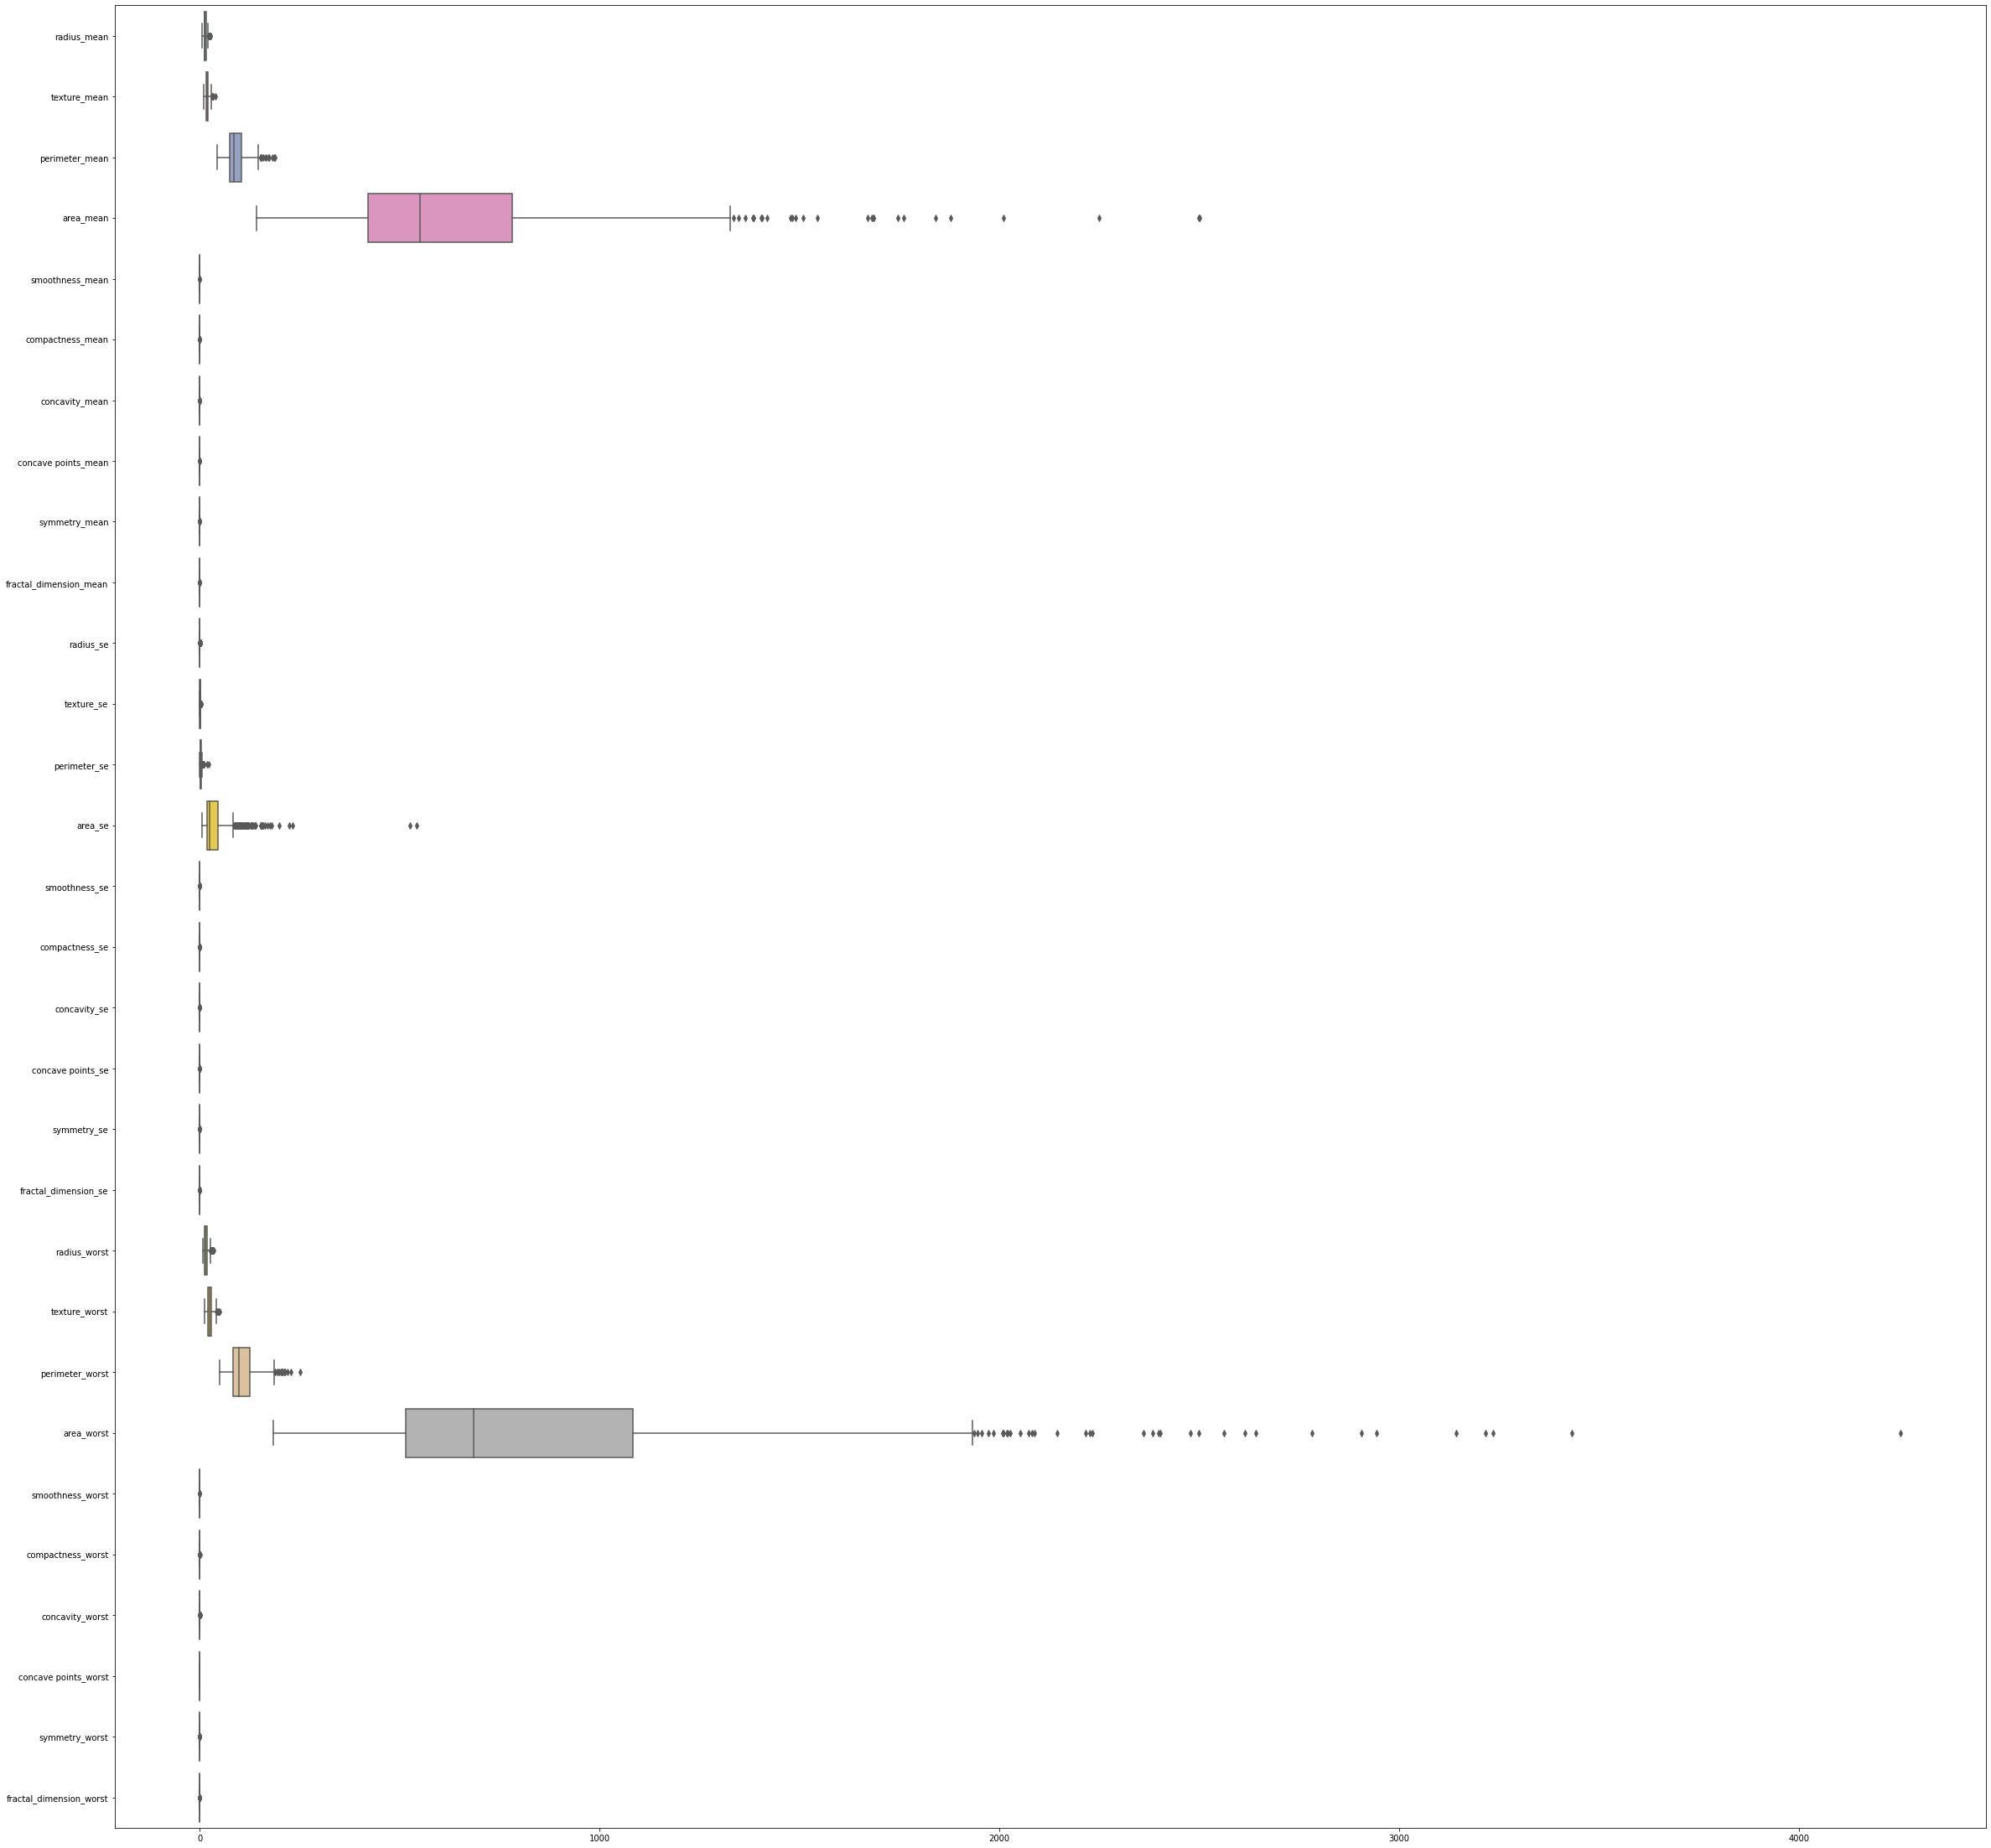

In [7]:
#make boxplot for each feature
plt.figure(figsize=(40,40))
sns.boxplot(data=X, orient='h', palette='Set2')
plt.show()

## ***Checking outliers for Malignant and Beignin***

In [8]:

df_m=df[df['diagnosis']=='M']
df_b=df[df['diagnosis']=='B']

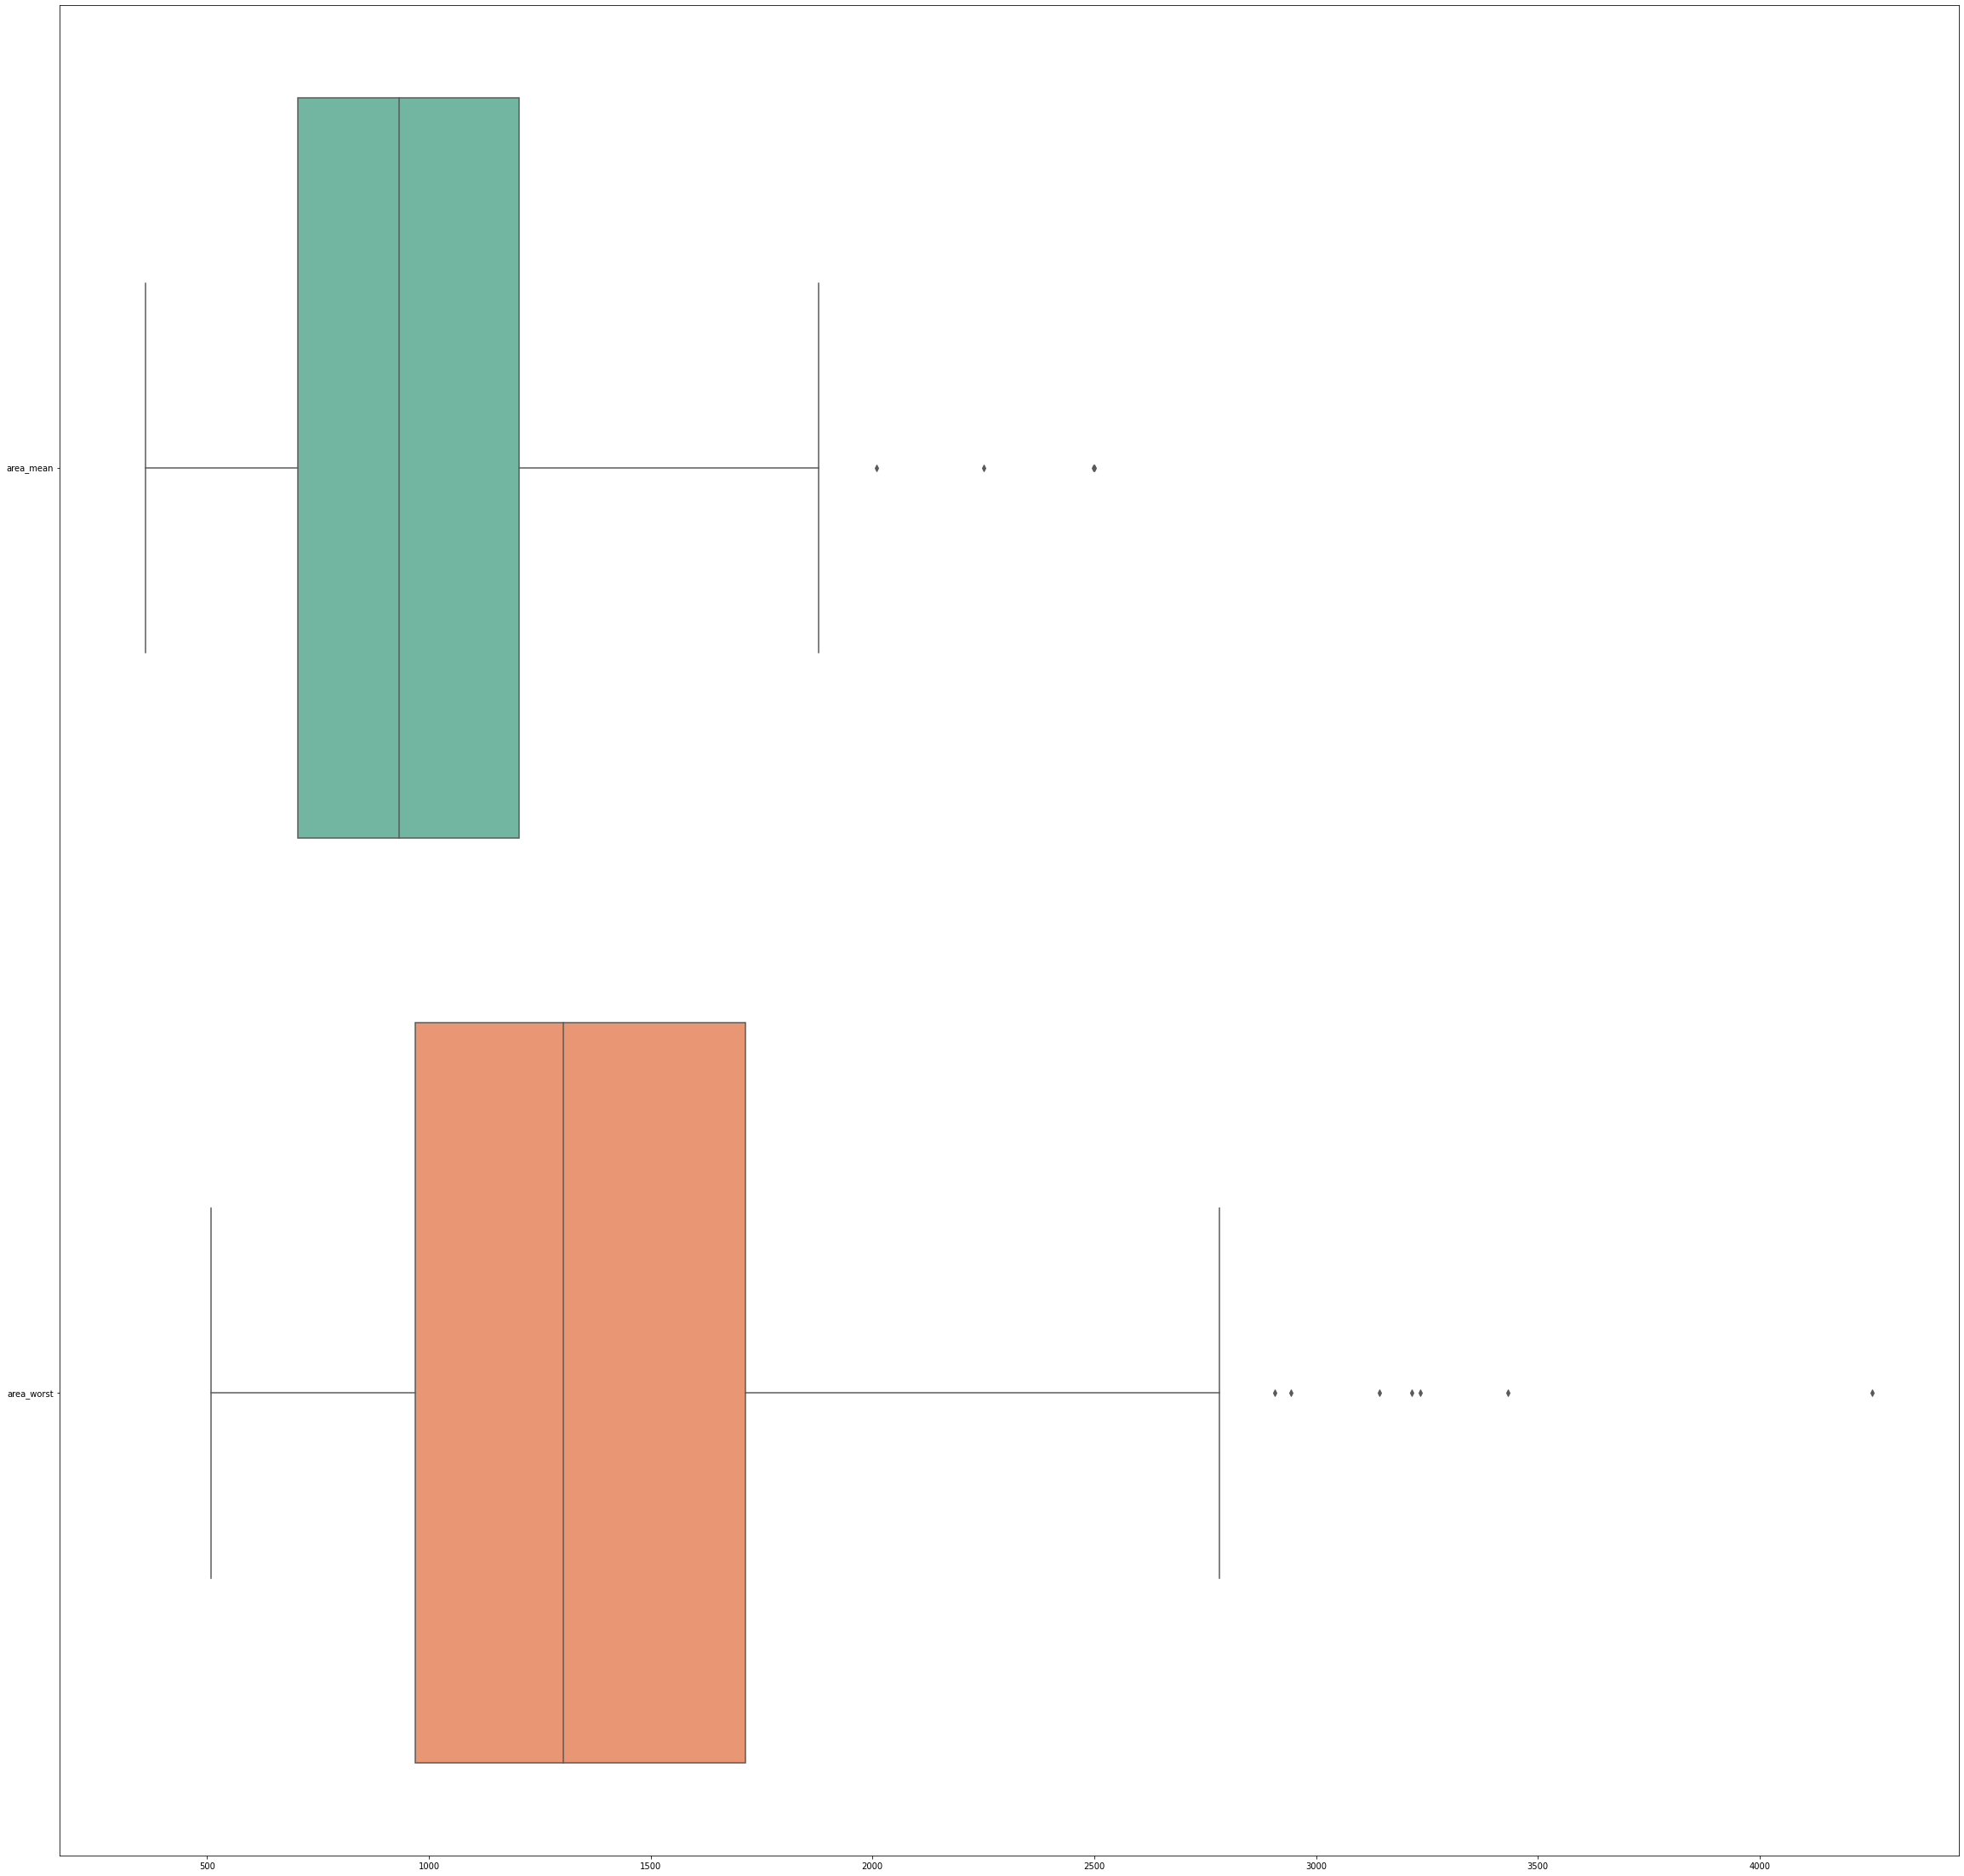

In [9]:
plt.figure(figsize=(40,40))
sns.boxplot(data=df_m[['area_mean','area_worst']], orient='h', palette='Set2')
plt.show()

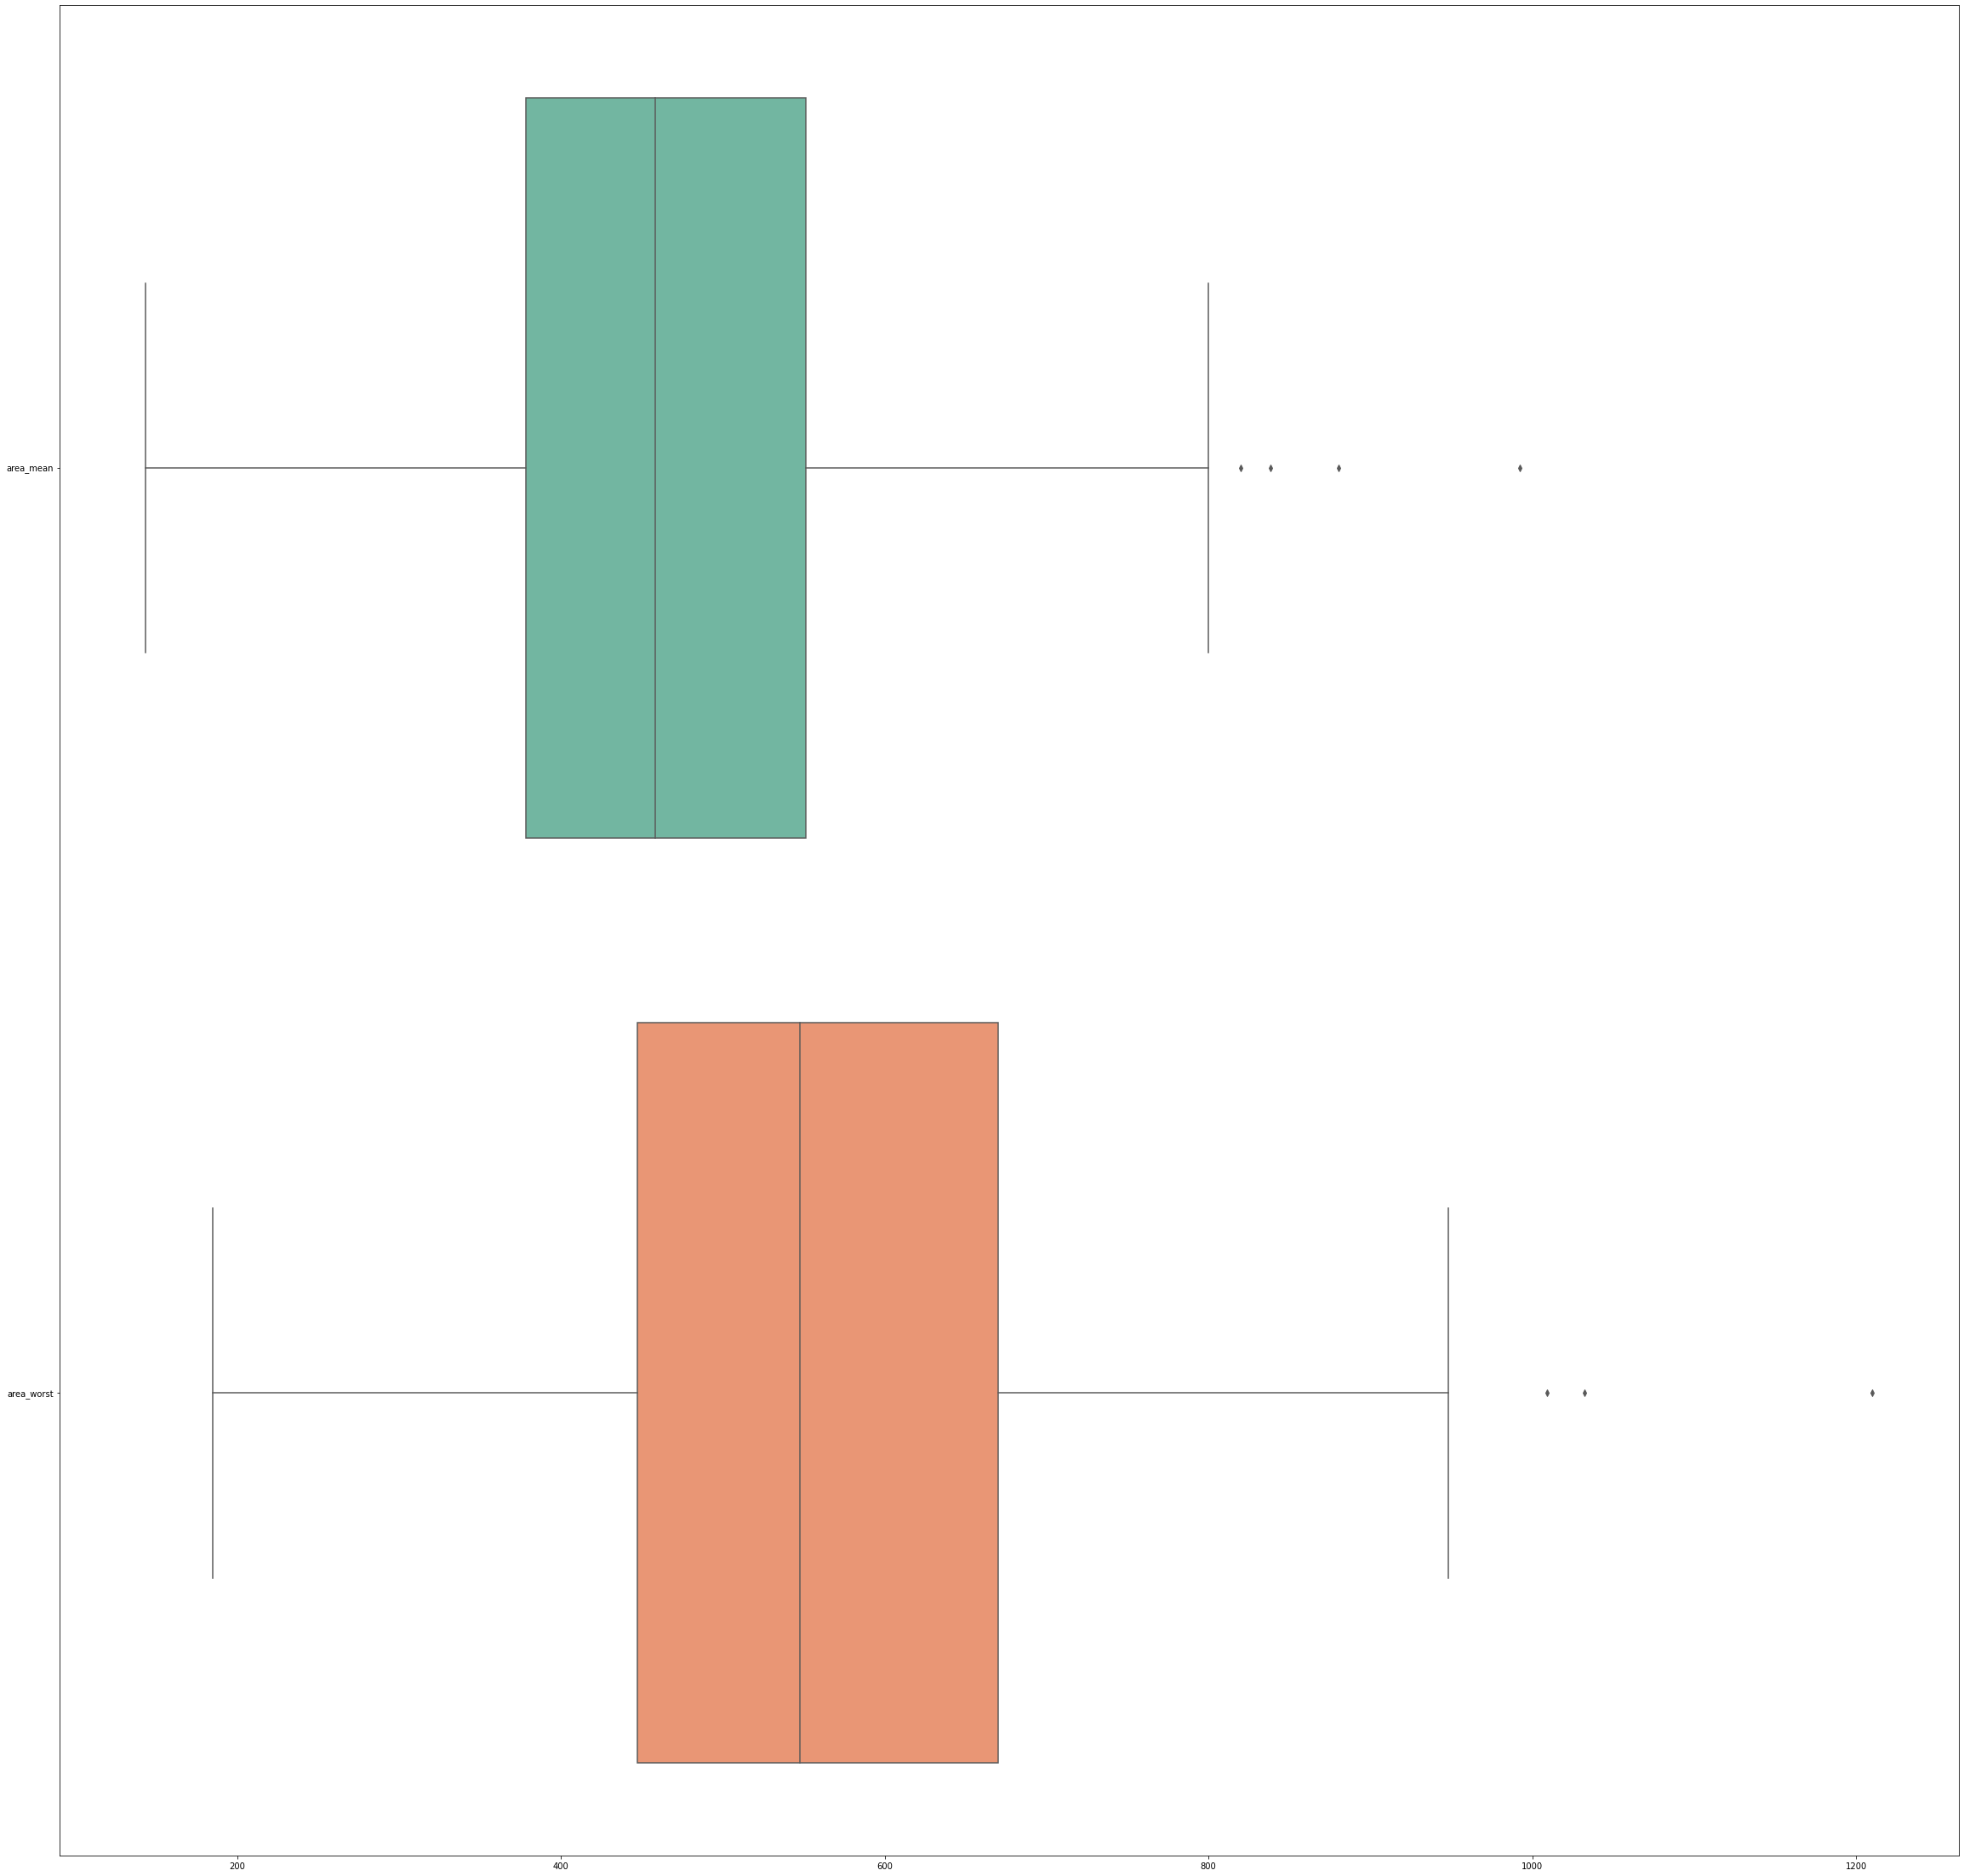

In [10]:
plt.figure(figsize=(40,40))
sns.boxplot(data=df_b[['area_mean','area_worst']], orient='h', palette='Set2')
plt.show()

## ***Checking Co-relation***

AxesSubplot(0.125,0.125;0.62x0.755)


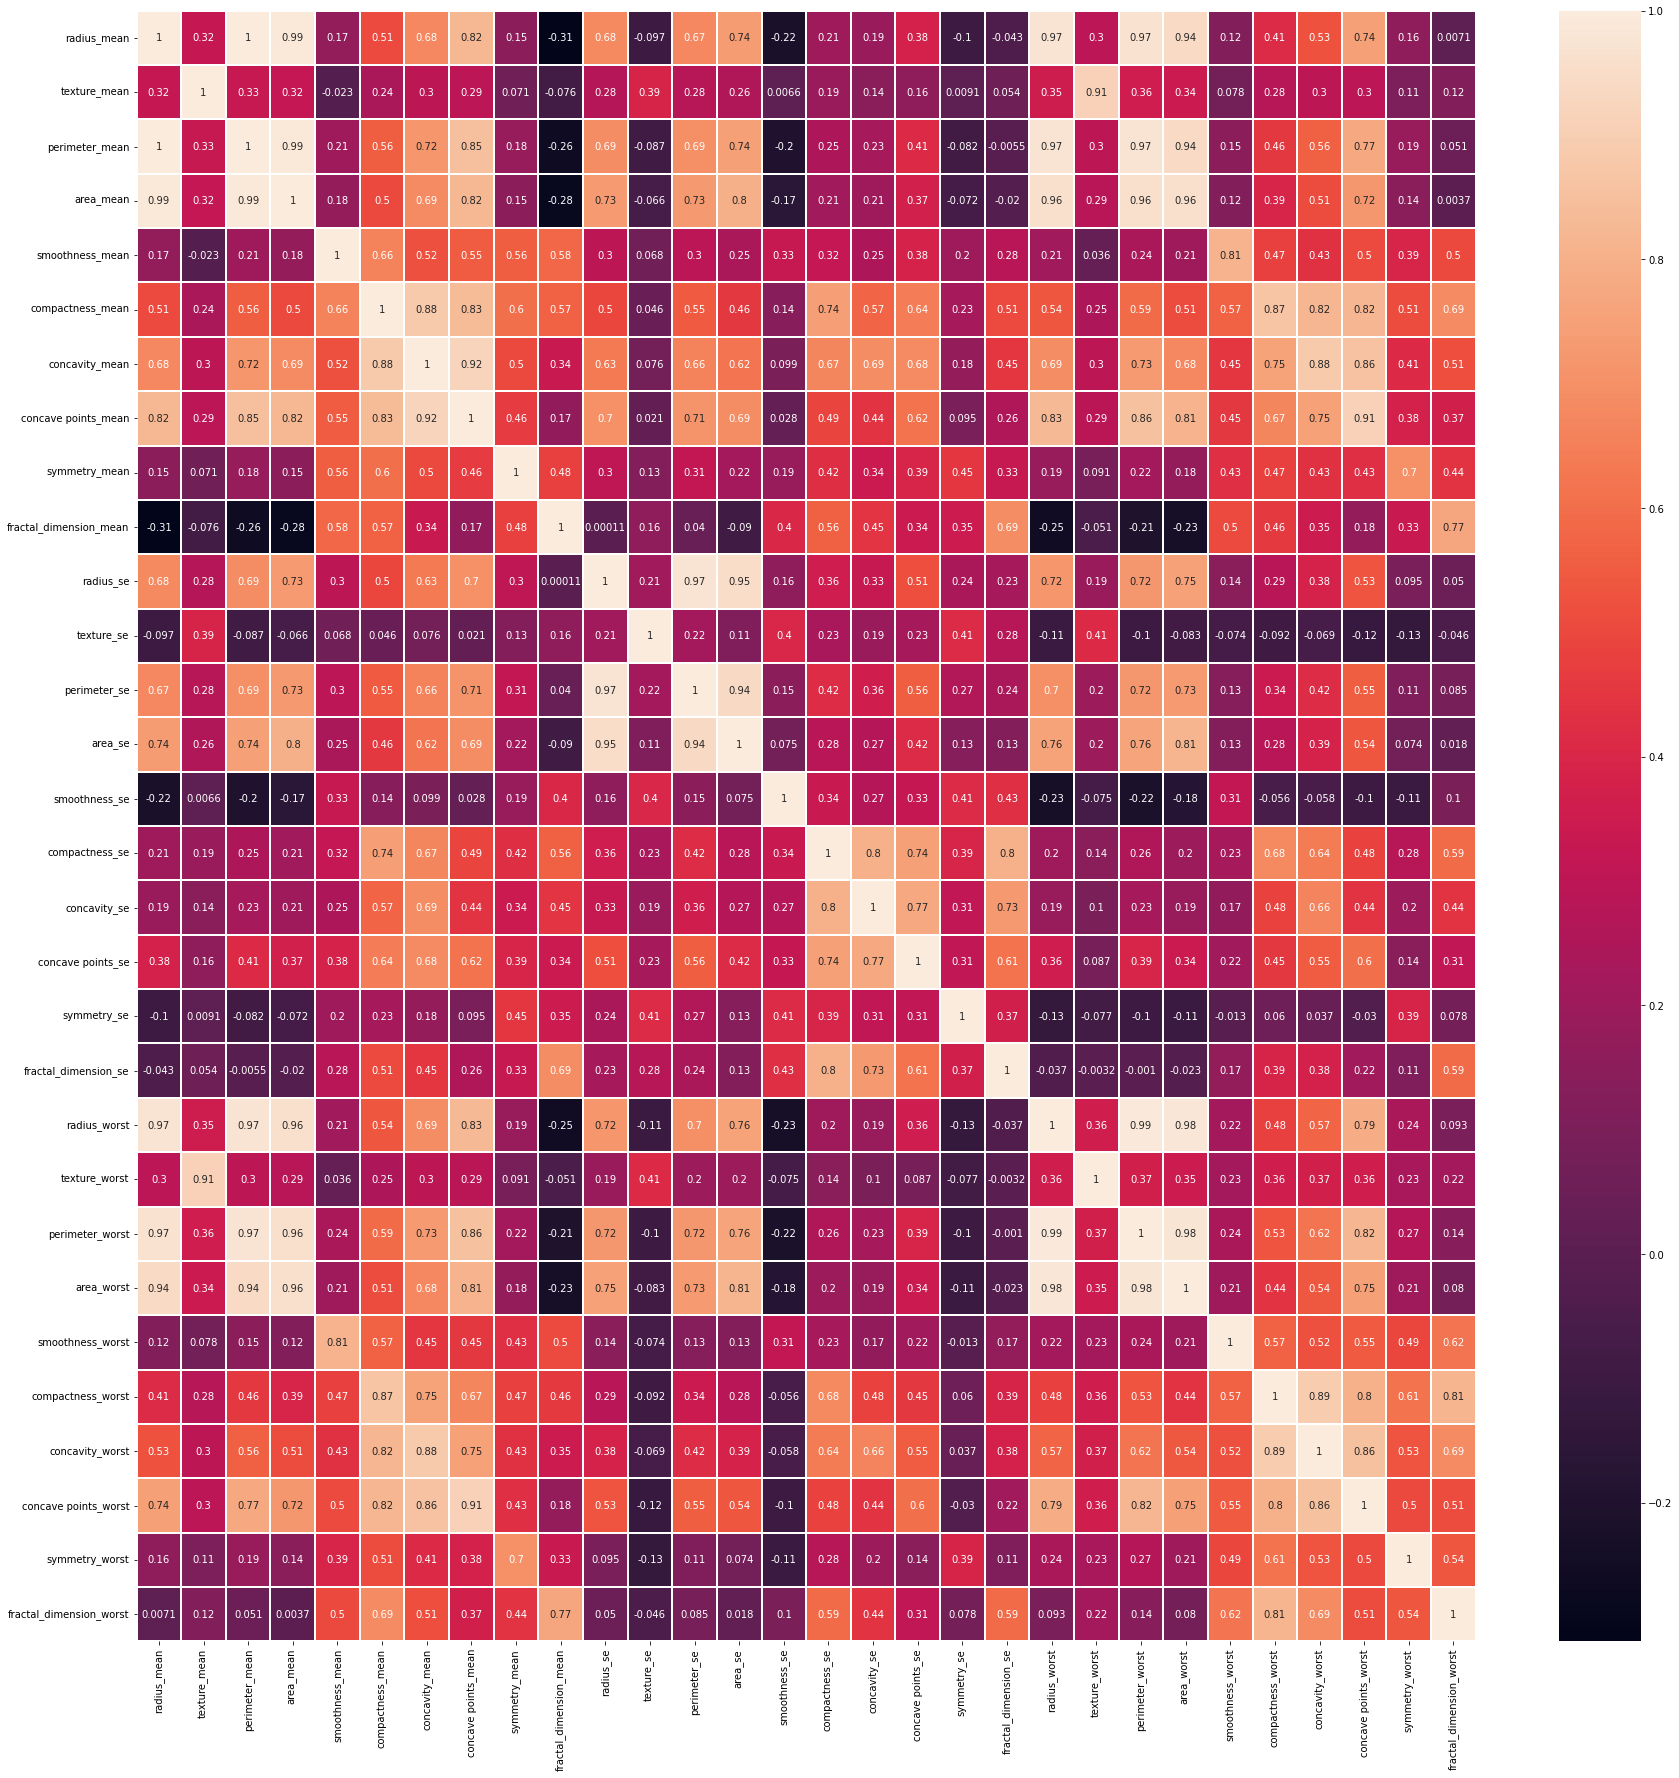

In [11]:
corr1=X.corr(method='pearson')
fig, ax = plt.subplots(figsize=(30,30)) 
print(sns.heatmap(corr1, annot=True,linewidths=2,ax=ax))

## ***DATA AUGMENTATION***

- In the diagram I have illustrated the process of data augmentation

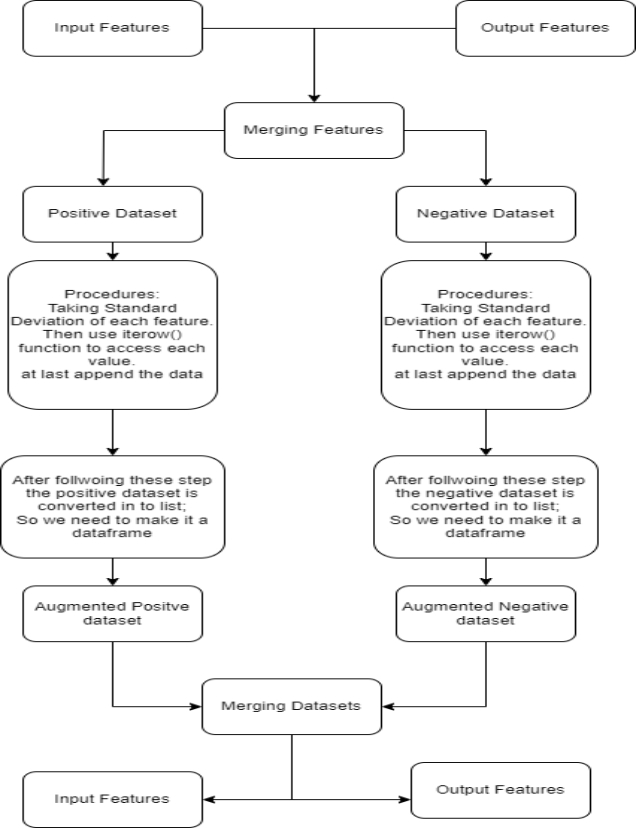

In [12]:
#insert image
from IPython.display import Image
Image(filename='/kaggle/input/picture-20/image20.png')


In [13]:
df_b.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
b_radius_mean=np.std(df_b['radius_mean'])
b_texture_mean=np.std(df_b['texture_mean'])
b_perimeter_mean=np.std(df_b['perimeter_mean'])
b_area_mean=np.std(df_b['area_mean'])
b_smoothness_mean=np.std(df_b['smoothness_mean'])
b_compactness_mean=np.std(df_b['compactness_mean'])
b_concavity_mean=np.std(df_b['concavity_mean'])
b_concave_points_mean=np.std(df_b['concave points_mean'])
b_symmetry_mean=np.std(df_b['symmetry_mean'])
b_fractal_dimension_mean=np.std(df_b['fractal_dimension_mean'])
b_radius_se=np.std(df_b['radius_se'])
b_texture_se=np.std(df_b['texture_se'])
b_perimeter_se=np.std(df_b['perimeter_se'])
b_area_se=np.std(df_b['area_se'])
b_smoothness_se=np.std(df_b['smoothness_se'])
b_compactness_se=np.std(df_b['compactness_se'])
b_concavity_se=np.std(df_b['concavity_se'])
b_concave_points_se=np.std(df_b['concave points_se'])
b_symmetry_se=np.std(df_b['symmetry_se'])
b_fractal_dimension_se=np.std(df_b['fractal_dimension_se'])
b_radius_worst=np.std(df_b['radius_worst'])
b_texture_worst=np.std(df_b['texture_worst'])
b_perimeter_worst=np.std(df_b['perimeter_worst'])
b_area_worst=np.std(df_b['area_worst'])
b_smoothness_worst=np.std(df_b['smoothness_worst'])
b_compactness_worst=np.std(df_b['compactness_worst'])
b_concavity_worst=np.std(df_b['concavity_worst'])
b_concave_points_worst=np.std(df_b['concave points_worst'])
b_symmetry_worst=np.std(df_b['symmetry_worst'])
b_fractal_dimension_worst=np.std(df_b['fractal_dimension_worst'])


In [15]:
dataset_b=[]
for _,row in df_b.iterrows():
        temp={
            'radius_mean':row['radius_mean'],
            'texture_mean':row['texture_mean'],
            'perimeter_mean':row['perimeter_mean'],
            'area_mean':row['area_mean'],
            'smoothness_mean':row['smoothness_mean'],
            'compactness_mean':row['compactness_mean'],
            'concavity_mean':row['concavity_mean'],
            'concave points_mean':row['concave points_mean'],
            'symmetry_mean':row['symmetry_mean'],
            'fractal_dimension_mean':row['fractal_dimension_mean'],
            'radius_se':row['radius_se'],
            'texture_se':row['texture_se'],
            'perimeter_se':row['perimeter_se'],
            'area_se':row['area_se'],
            'smoothness_se':row['smoothness_se'],
            'compactness_se':row['compactness_se'],
            'concavity_se':row['concavity_se'],
            'concave points_se':row['concave points_se'],
            'symmetry_se':row['symmetry_se'],
            'fractal_dimension_se':row['fractal_dimension_se'],
            'radius_worst':row['radius_worst'],
            'texture_worst':row['texture_worst'],
            'perimeter_worst':row['perimeter_worst'],
            'area_worst':row['area_worst'],
            'smoothness_worst':row['smoothness_worst'],
            'compactness_worst':row['compactness_worst'],
            'concavity_worst':row['concavity_worst'],
            'concave points_worst':row['concave points_worst'],
            'symmetry_worst':row['symmetry_worst'],
            'fractal_dimension_worst':row['fractal_dimension_worst'],
            'diagnosis':0
        }
        dataset_b.append(temp)
for _ in range(2):
    for _,row in df_b.iterrows():
        temp={
                'radius_mean':row['radius_mean']+np.random.normal(b_radius_mean),
                'texture_mean':row['texture_mean']+np.random.normal(b_texture_mean),
                'perimeter_mean':row['perimeter_mean']+np.random.normal(b_perimeter_mean),
                'area_mean':row['area_mean']+np.random.normal(b_area_mean),
                'smoothness_mean':row['smoothness_mean']+np.random.normal(b_smoothness_mean),
                'compactness_mean':row['compactness_mean']+np.random.normal(b_compactness_mean),
                'concavity_mean':row['concavity_mean']+np.random.normal(b_concavity_mean),
                'concave points_mean':row['concave points_mean']+np.random.normal(b_concave_points_mean),
                'symmetry_mean':row['symmetry_mean']+np.random.normal(b_symmetry_mean),
                'fractal_dimension_mean':row['fractal_dimension_mean']+np.random.normal(b_fractal_dimension_mean),
                'radius_se':row['radius_se']+np.random.normal(b_radius_se),
                'texture_se':row['texture_se']+np.random.normal(b_texture_se),
                'perimeter_se':row['perimeter_se']+np.random.normal(b_perimeter_se),
                'area_se':row['area_se']+np.random.normal(b_area_se),
                'smoothness_se':row['smoothness_se']+np.random.normal(b_smoothness_se),
                'compactness_se':row['compactness_se']+np.random.normal(b_compactness_se),
                'concavity_se':row['concavity_se']+np.random.normal(b_concavity_se),
                'concave points_se':row['concave points_se']+np.random.normal(b_concave_points_se),
                'symmetry_se':row['symmetry_se']+np.random.normal(b_symmetry_se),
                'fractal_dimension_se':row['fractal_dimension_se']+np.random.normal(b_fractal_dimension_se),
                'radius_worst':row['radius_worst']+np.random.normal(b_radius_worst),
                'texture_worst':row['texture_worst']+np.random.normal(b_texture_worst),
                'perimeter_worst':row['perimeter_worst']+np.random.normal(b_perimeter_worst),
                'area_worst':row['area_worst']+np.random.normal(b_area_worst),
                'smoothness_worst':row['smoothness_worst']+np.random.normal(b_smoothness_worst),
                'compactness_worst':row['compactness_worst']+np.random.normal(b_compactness_worst),
                'concavity_worst':row['concavity_worst']+np.random.normal(b_concavity_worst),
                'concave points_worst':row['concave points_worst']+np.random.normal(b_concave_points_worst),
                'symmetry_worst':row['symmetry_worst']+np.random.normal(b_symmetry_worst),
                'fractal_dimension_worst':row['fractal_dimension_worst']+np.random.normal(b_fractal_dimension_worst),
                'diagnosis':0
            }
        dataset_b.append(temp)
dataset_b=pd.DataFrame(dataset_b)
print(f'size')
print(f'Data size before Performing DataAugmentation:{len(df_b)}\n \nData size after performing Data Augmentation:{len(dataset_b)}')
            


size
Data size before Performing DataAugmentation:357
 
Data size after performing Data Augmentation:1071


# ***Negative Dataframe***

In [16]:
m_radius_mean=np.std(df_m['radius_mean'])
m_texture_mean=np.std(df_m['texture_mean'])
m_perimeter_mean=np.std(df_m['perimeter_mean'])
m_area_mean=np.std(df_m['area_mean'])
m_smoothness_mean=np.std(df_m['smoothness_mean'])
m_compactness_mean=np.std(df_m['compactness_mean'])
m_concavity_mean=np.std(df_m['concavity_mean'])
m_concave_points_mean=np.std(df_m['concave points_mean'])
m_symmetry_mean=np.std(df_m['symmetry_mean'])
m_fractal_dimension_mean=np.std(df_m['fractal_dimension_mean'])
m_radius_se=np.std(df_m['radius_se'])
m_texture_se=np.std(df_m['texture_se'])
m_perimeter_se=np.std(df_m['perimeter_se'])
m_area_se=np.std(df_m['area_se'])
m_smoothness_se=np.std(df_m['smoothness_se'])
m_compactness_se=np.std(df_m['compactness_se'])
m_concavity_se=np.std(df_m['concavity_se'])
m_concave_points_se=np.std(df_m['concave points_se'])
m_symmetry_se=np.std(df_m['symmetry_se'])
m_fractal_dimension_se=np.std(df_m['fractal_dimension_se'])
m_radius_worst=np.std(df_m['radius_worst'])
m_texture_worst=np.std(df_m['texture_worst'])
m_perimeter_worst=np.std(df_m['perimeter_worst'])
m_area_worst=np.std(df_m['area_worst'])
m_smoothness_worst=np.std(df_m['smoothness_worst'])
m_compactness_worst=np.std(df_m['compactness_worst'])
m_concavity_worst=np.std(df_m['concavity_worst'])
m_concave_points_worst=np.std(df_m['concave points_worst'])
m_symmetry_worst=np.std(df_m['symmetry_worst'])
m_fractal_dimension_worst=np.std(df_m['fractal_dimension_worst'])


In [17]:
dataset_m=[]
for _,row in df_m.iterrows():
        temp={
            'radius_mean':row['radius_mean'],
            'texture_mean':row['texture_mean'],
            'perimeter_mean':row['perimeter_mean'],
            'area_mean':row['area_mean'],
            'smoothness_mean':row['smoothness_mean'],
            'compactness_mean':row['compactness_mean'],
            'concavity_mean':row['concavity_mean'],
            'concave points_mean':row['concave points_mean'],
            'symmetry_mean':row['symmetry_mean'],
            'fractal_dimension_mean':row['fractal_dimension_mean'],
            'radius_se':row['radius_se'],
            'texture_se':row['texture_se'],
            'perimeter_se':row['perimeter_se'],
            'area_se':row['area_se'],
            'smoothness_se':row['smoothness_se'],
            'compactness_se':row['compactness_se'],
            'concavity_se':row['concavity_se'],
            'concave points_se':row['concave points_se'],
            'symmetry_se':row['symmetry_se'],
            'fractal_dimension_se':row['fractal_dimension_se'],
            'radius_worst':row['radius_worst'],
            'texture_worst':row['texture_worst'],
            'perimeter_worst':row['perimeter_worst'],
            'area_worst':row['area_worst'],
            'smoothness_worst':row['smoothness_worst'],
            'compactness_worst':row['compactness_worst'],
            'concavity_worst':row['concavity_worst'],
            'concave points_worst':row['concave points_worst'],
            'symmetry_worst':row['symmetry_worst'],
            'fractal_dimension_worst':row['fractal_dimension_worst'],
            'diagnosis':1
        }
        dataset_m.append(temp)
for _ in range(2):
    for _,row in df_m.iterrows():
        temp={
                'radius_mean':row['radius_mean']+np.random.normal(m_radius_mean),
                'texture_mean':row['texture_mean']+np.random.normal(m_texture_mean),
                'perimeter_mean':row['perimeter_mean']+np.random.normal(m_perimeter_mean),
                'area_mean':row['area_mean']+np.random.normal(b_area_mean),
                'smoothness_mean':row['smoothness_mean']+np.random.normal(m_smoothness_mean),
                'compactness_mean':row['compactness_mean']+np.random.normal(m_compactness_mean),
                'concavity_mean':row['concavity_mean']+np.random.normal(m_concavity_mean),
                'concave points_mean':row['concave points_mean']+np.random.normal(m_concave_points_mean),
                'symmetry_mean':row['symmetry_mean']+np.random.normal(m_symmetry_mean),
                'fractal_dimension_mean':row['fractal_dimension_mean']+np.random.normal(m_fractal_dimension_mean),
                'radius_se':row['radius_se']+np.random.normal(m_radius_se),
                'texture_se':row['texture_se']+np.random.normal(m_texture_se),
                'perimeter_se':row['perimeter_se']+np.random.normal(m_perimeter_se),
                'area_se':row['area_se']+np.random.normal(m_area_se),
                'smoothness_se':row['smoothness_se']+np.random.normal(m_smoothness_se),
                'compactness_se':row['compactness_se']+np.random.normal(m_compactness_se),
                'concavity_se':row['concavity_se']+np.random.normal(m_concavity_se),
                'concave points_se':row['concave points_se']+np.random.normal(m_concave_points_se),
                'symmetry_se':row['symmetry_se']+np.random.normal(m_symmetry_se),
                'fractal_dimension_se':row['fractal_dimension_se']+np.random.normal(m_fractal_dimension_se),
                'radius_worst':row['radius_worst']+np.random.normal(m_radius_worst),
                'texture_worst':row['texture_worst']+np.random.normal(m_texture_worst),
                'perimeter_worst':row['perimeter_worst']+np.random.normal(m_perimeter_worst),
                'area_worst':row['area_worst']+np.random.normal(m_area_worst),
                'smoothness_worst':row['smoothness_worst']+np.random.normal(m_smoothness_worst),
                'compactness_worst':row['compactness_worst']+np.random.normal(m_compactness_worst),
                'concavity_worst':row['concavity_worst']+np.random.normal(m_concavity_worst),
                'concave points_worst':row['concave points_worst']+np.random.normal(m_concave_points_worst),
                'symmetry_worst':row['symmetry_worst']+np.random.normal(m_symmetry_worst),
                'fractal_dimension_worst':row['fractal_dimension_worst']+np.random.normal(m_fractal_dimension_worst),
                'diagnosis':0
            }
        dataset_m.append(temp)
dataset_m=pd.DataFrame(dataset_m)
print(f'size')
print(f'Data size before Performing DataAugmentation:{len(df_m)}\n \nData size after performing Data Augmentation:{len(dataset_m)}')
            


size
Data size before Performing DataAugmentation:212
 
Data size after performing Data Augmentation:636


## ***MERGING POSITIVE AND NEGATIVE DATA SAMPLES INTO ONE DATASETS***

In [18]:
dataset_full=dataset_b.append(dataset_m)

## ***SPLITTING FINAL DATASET INTO INPUT (X) AND OUTPUT (Y)***

In [19]:
#split into x and y
X_final=dataset_full.drop('diagnosis',axis=1)
Y_final=dataset_full['diagnosis']


## <center>***Passing Data to Machine Learning Algorithms***</center>

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.25)
for clf in (LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), XGBClassifier()):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print("\n_______________________________________________________\n")
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))
    print(f'the accuracy score is:{accuracy_score(Y_test, y_pred)}')
    print(f'the f1-score is:{f1_score(Y_test, y_pred)}')
    print(f'the recall-score is:{recall_score(Y_test, y_pred)}')
    print(f'the confusion_matrix is:{confusion_matrix(Y_test, y_pred)}')
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print(f'Specificity is:',tn / (tn+fp))
    print(f'Precision is:',tp / (tp+fp))
    #pickle model for each classifier
    pickle.dump(clf,open(f'{clf.__class__.__name__}.pkl','wb'))
    print("\n_______________________________________________________\n")



_______________________________________________________

LogisticRegression 0.9180327868852459
the accuracy score is:0.9180327868852459
the f1-score is:0.5783132530120482
the recall-score is:0.5106382978723404
the confusion_matrix is:[[368  12]
 [ 23  24]]
Specificity is: 0.968421052631579
Precision is: 0.6666666666666666

_______________________________________________________


_______________________________________________________

RandomForestClassifier 0.9836065573770492
the accuracy score is:0.9836065573770492
the f1-score is:0.9213483146067415
the recall-score is:0.8723404255319149
the confusion_matrix is:[[379   1]
 [  6  41]]
Specificity is: 0.9973684210526316
Precision is: 0.9761904761904762

_______________________________________________________


_______________________________________________________

SVC 0.8899297423887588
the accuracy score is:0.8899297423887588
the f1-score is:0.0
the recall-score is:0.0
the confusion_matrix is:[[380   0]
 [ 47   0]]
Specificity is: 

## Voting Classifier

In [21]:
#voting classifier
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.25)
voting_clf = VotingClassifier(estimators=[('lr',LogisticRegression() ), ('rf', RandomForestClassifier()), ('xgb', SVC())], voting='hard')
voting_clf.fit(X_train, Y_train)
y_pred = voting_clf.predict(X_test)
print("\n_______________________________________________________\n")
print(voting_clf.__class__.__name__, accuracy_score(Y_test, y_pred))
print(f'the accuracy score is:{accuracy_score(Y_test, y_pred)}')
print(f'the f1-score is:{f1_score(Y_test, y_pred)}')
print(f'the recall-score is:{recall_score(Y_test, y_pred)}')
print(f'the confusion_matrix is:{confusion_matrix(Y_test, y_pred)}')
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'Specificity is:',tn / (tn+fp))
print(f'Precision is:',tp / (tp+fp))
#pickle model for each classifier
pickle.dump(clf,open(f'{voting_clf.__class__.__name__}.pkl','wb'))
print("\n_______________________________________________________\n")


_______________________________________________________

VotingClassifier 0.9601873536299765
the accuracy score is:0.9601873536299765
the f1-score is:0.7901234567901235
the recall-score is:0.6530612244897959
the confusion_matrix is:[[378   0]
 [ 17  32]]
Specificity is: 1.0
Precision is: 1.0

_______________________________________________________

